In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2
import os
from os.path import isfile, join


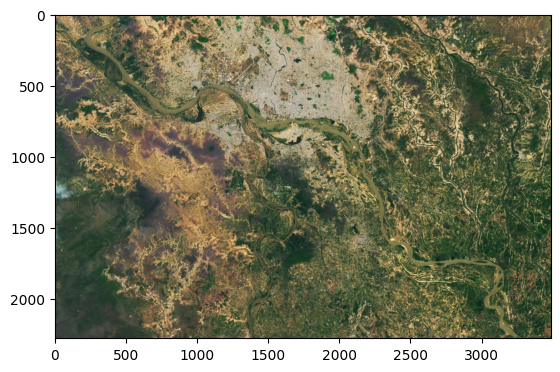

In [20]:
rgb_image=plt.imread("rgb.jpg")

plt.imshow(rgb_image)

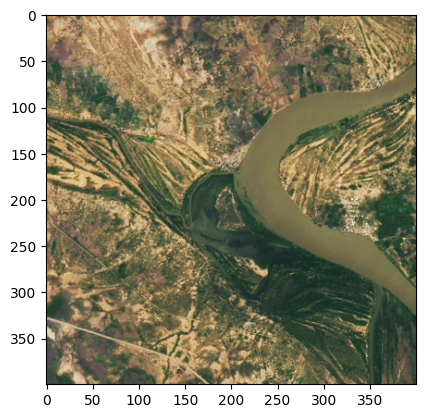

In [21]:
def cut_image(img,x,y,t1,t2):
    return img[x:t1+x,y:t2+y,:]

def save_image(img,name,format="png"):
    im = Image.fromarray(img)
    im.save(f"{name}."+format)


cutted_image=cut_image(rgb_image,0,0,400,400)

plt.imshow(cutted_image)
#save_image(cv2.cvtColor(cutted_image, cv2.COLOR_BGR2GRAY),"my_image","jpeg")


In [22]:
save_image(cutted_image,"my_image","png")
save_image(cutted_image,"my_image","jpeg")
save_image(cutted_image,"my_image","bmp")
save_image(cutted_image,"my_image","tiff")
save_image(cutted_image,"my_image","gif")

Taille image format png: 329.6162109375 KB


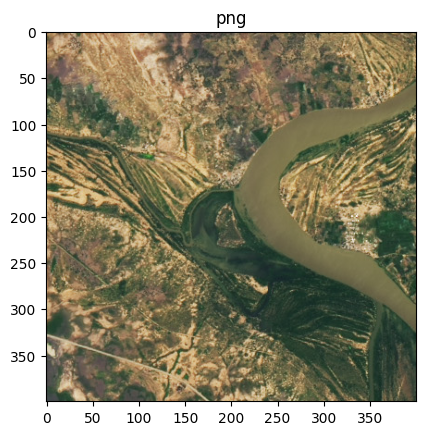

In [23]:

files = [f for f in os.listdir(".") if isfile(join(".", f)) and f.split(".")[0]=="my_image" ]

png_image=plt.imread(files[0])
plt.title(files[0].split(".")[1])
plt.imshow(png_image)
print("Taille image format png:", os.stat(files[0]).st_size/(1024),"KB")


Taille image format bmp: 468.802734375 KB


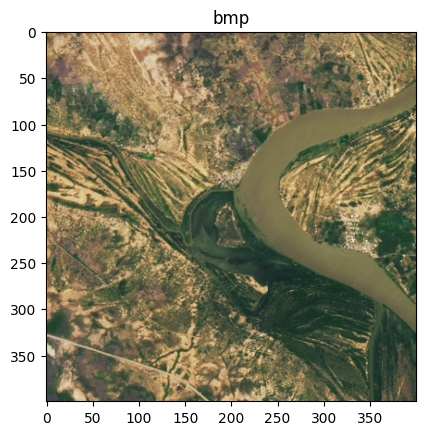

In [38]:
bmp_img=plt.imread(files[1])
plt.title(files[1].split(".")[1])
plt.imshow(bmp_img)
print("Taille image format bmp:", os.stat(files[1]).st_size/(1024),"KB")


Taille image format png: 167.4609375 KB


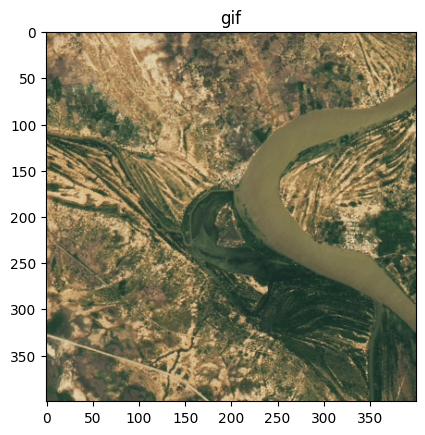

In [15]:
gif_img=plt.imread(files[2])
plt.title(files[2].split(".")[1])
plt.imshow(gif_img)
print("Taille image format png:", os.stat(files[2]).st_size/(1024),"KB")


Taille image format png: 468.88671875 KB


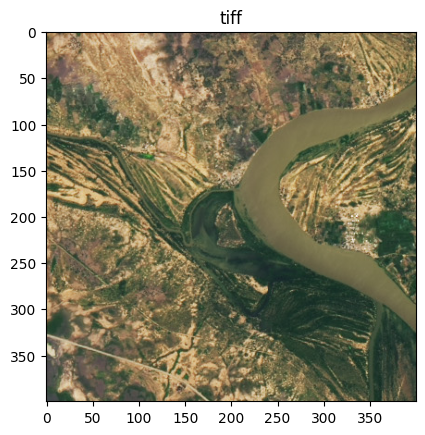

In [16]:
tiff_img=plt.imread(files[3])
plt.title(files[3].split(".")[1])
plt.imshow(tiff_img)
print("Taille image format png:", os.stat(files[3]).st_size/(1024),"KB")


Taille image format png: 39.1220703125 KB


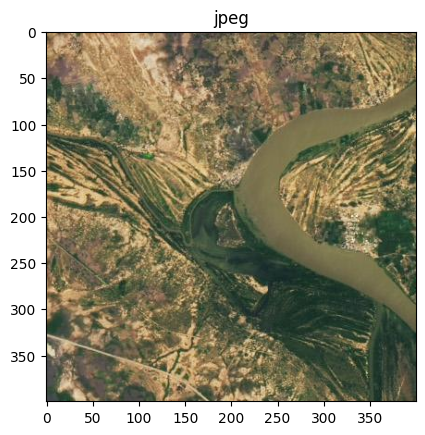

In [17]:
jpeg_img=plt.imread(files[4])
plt.title(files[4].split(".")[1])
plt.imshow(jpeg_img)
print("Taille image format png:", os.stat(files[4]).st_size/(1024),"KB")


<h3>Mean quared error:</h3>

In [47]:
def mean_squard_error(refrence,to_compare):
   return np.square(refrence-to_compare).mean()

print("mse(png,jpeg):",mean_squard_error(png_image*255,jpeg_img))  
print("mse(png,bmp):",mean_squard_error(png_image*255,bmp_img))  
#print("mse(png,tiff):",mean_squard_error(png_image*255,tiff_img))  
#print("mse(png,gif):",mean_squard_error(png_image*255,gif_img))  


mse(png,jpeg): 45.50909
mse(png,bmp): 0.0


Text(0.5, 1.0, 'jpeg')

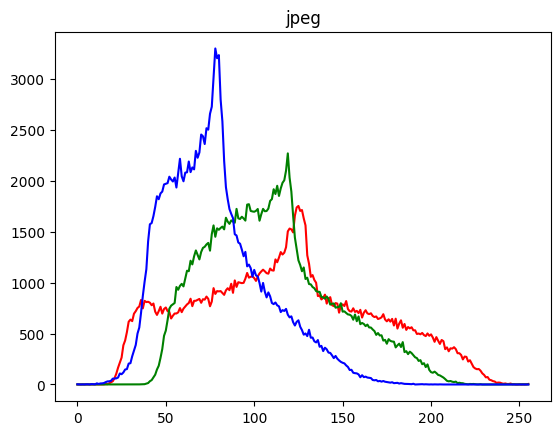

In [127]:
def rgb_components(img):
    img=img.copy()
    return img[:,:,0],img[:,:,1],img[:,:,2]

r_jpeg,g_jpeg,b_jpeg=rgb_components(jpeg_img)

def histo(img,x):
    
    counts=np.count_nonzero(img==x)
    return counts

r_histograme=[histo(r_jpeg,i) for i in range(256)]
g_histograme=[histo(g_jpeg,i) for i in range(256)]
b_histograme=[histo(b_jpeg,i) for i in range(256)]
plt.plot(np.arange(0,256,1),r_histograme,c="red")
plt.plot(np.arange(0,256,1),g_histograme,c="green")
plt.plot(np.arange(0,256,1),b_histograme,c="blue")
plt.title("jpeg")



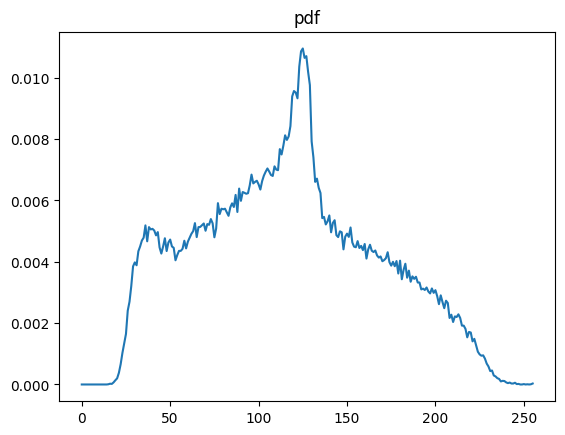

In [128]:


n=r_jpeg.shape[0]
m=r_jpeg.shape[1]

def pdf2(img,x):
    n=img.shape[0]*img.shape[1]
    counts=np.count_nonzero(img==x)
    return counts/n

values=np.arange(0,256,1)
probs=np.array([pdf2(r_jpeg,i) for i in range(256)])
plt.plot(values,probs)
plt.title("pdf")

def cdf(x,probs):
    return np.sum(probs[0:x])


def equa_pdf(x,probs):
    L=256
    return np.round((cdf(x,probs))*(L-1))
    


  

    

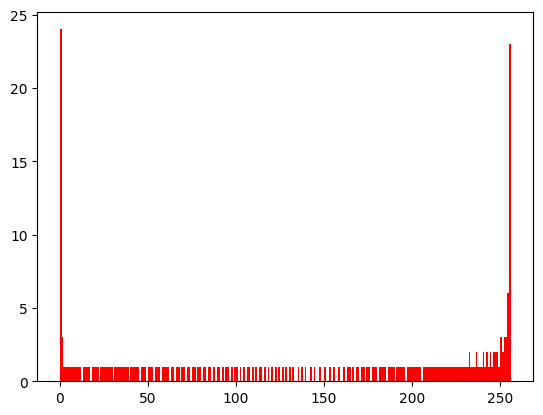

In [132]:
arr=np.array([equa_pdf(i,probs) for i in range(0,256)])

hist,bins = np.histogram(arr,256,range=(0,256))

plt.hist(arr.flatten(),bins,[0,256], color = 'r')

plt.show()


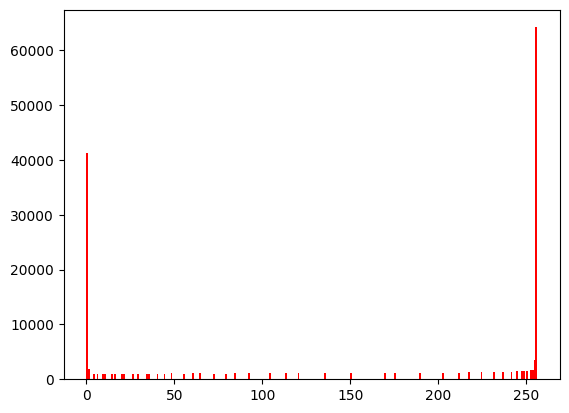

In [148]:


r=r_jpeg.copy()
for i in range(400):
    for j in range(m):
        r_jpeg[i][j]=int(arr[r[i][j]])


hist,bins = np.histogram(r_jpeg,256,range=(0,256))

plt.hist(r_jpeg.flatten(),bins,[0,256], color = 'r')

plt.show()


[[171 150 166 ...  73  78 116]
 [163 114 130 ...  99  76  50]
 [186 126 128 ... 144 109  92]
 ...
 [ 55  58  59 ...  40  33  38]
 [ 52  55  58 ...  34  33  43]
 [ 50  54  56 ...  32  36  52]]


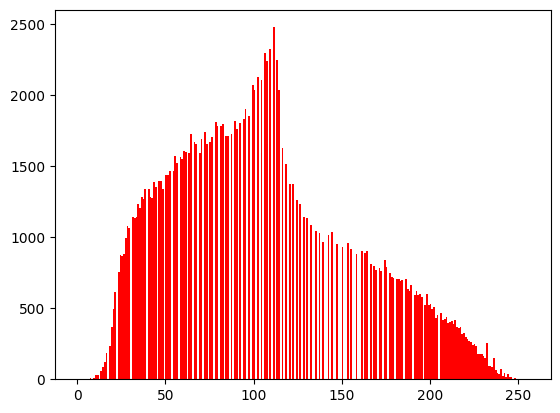

In [91]:
# gray_jpeg=cv2.cvtColor(jpeg_img, cv2.COLOR_BGR2GRAY)


# for i in range(n):
#     for j in range(m):
#         gray_jpeg[i][j]=int(arr[gray_jpeg[i][j]])


# hist,bins = np.histogram(gray_jpeg,256,range=(0,256))
# print(gray_jpeg)
# plt.hist(gray_jpeg.flatten(),bins,[0,256], color = 'r')

# plt.show()



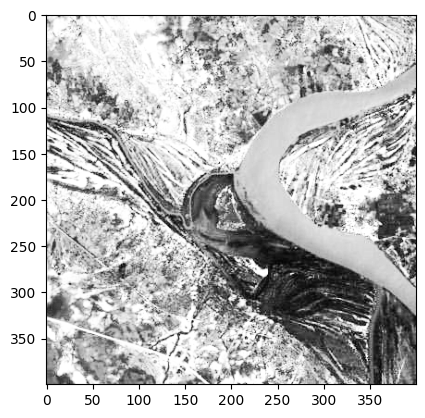

In [59]:
plt.imshow(gray_jpeg,cmap="gray")